In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
%matplotlib inline
plt.style.use('ggplot')

df=pd.read_pickle('10knew.pkl')

In [19]:
caches=df['cache'].unique()
sites=df['sitename'].unique()


mat= np.zeros((int(sites.size), 5))
heat_total=pd.DataFrame(data=mat, columns=caches, index=sites)
heat_total.head(5)

,root://data.ci-connect.net,root://xrd-cache-1.t2.ucsd.edu,root://osgxroot.usatlas.bnl.gov,root://hcc-stash.unl.edu,root://mwt2-stashcache.campuscluster.illinois.edu
MWT2_CE_UIUC,0.0,0.0,0.0,0.0,0.0
UCSDT2-C,0.0,0.0,0.0,0.0,0.0
SU-OG-CE1,0.0,0.0,0.0,0.0,0.0
Crane-CE1,0.0,0.0,0.0,0.0,0.0
Red,0.0,0.0,0.0,0.0,0.0


In [20]:
length=df.shape[0]
heat_fails=heat_total.copy(deep=True)
heat_percentage=heat_total.copy(deep=True)

for i in range(length):
    site=df['sitename'].iloc[i]
    cache=df['cache'].iloc[i]
    host=df['host'].iloc[i]
    if df['tries'].iloc[i]=='3':
        heat_fails.at[site,cache]+=1
        heat_total.at[site,cache]+=1
        heat_total.at[site,host]+=1
    if df['tries'].iloc[i]=='1':
        heat_total.at[site,cache]+=1

    

In [21]:
#heat_total.index

heat_total


,root://data.ci-connect.net,root://xrd-cache-1.t2.ucsd.edu,root://osgxroot.usatlas.bnl.gov,root://hcc-stash.unl.edu,root://mwt2-stashcache.campuscluster.illinois.edu
MWT2_CE_UIUC,2236.0,0.0,0.0,0.0,814.0
UCSDT2-C,0.0,440.0,0.0,0.0,0.0
SU-OG-CE1,774.0,0.0,858.0,0.0,0.0
Crane-CE1,1.0,0.0,0.0,21.0,0.0
Red,0.0,0.0,0.0,90.0,0.0
red-gateway2,2.0,0.0,0.0,548.0,0.0
red-gateway1,1.0,0.0,0.0,527.0,0.0
GLOW-OSG,43.0,0.0,0.0,0.0,0.0
Sandhills-CE1,0.0,0.0,0.0,189.0,0.0
Hyak_CE,120.0,242.0,0.0,0.0,0.0


In [29]:
heat_fails
heat_fails.iloc[2,2]

774.0

In [43]:
import math
rows=heat_fails.shape[0]

for i in range(rows):
    for j in range(5):
        num=heat_fails.iloc[i,j]/heat_total.iloc[i,j]
        if math.isnan(num):
            num=0
        heat_percentage.iloc[i,j]=num
        


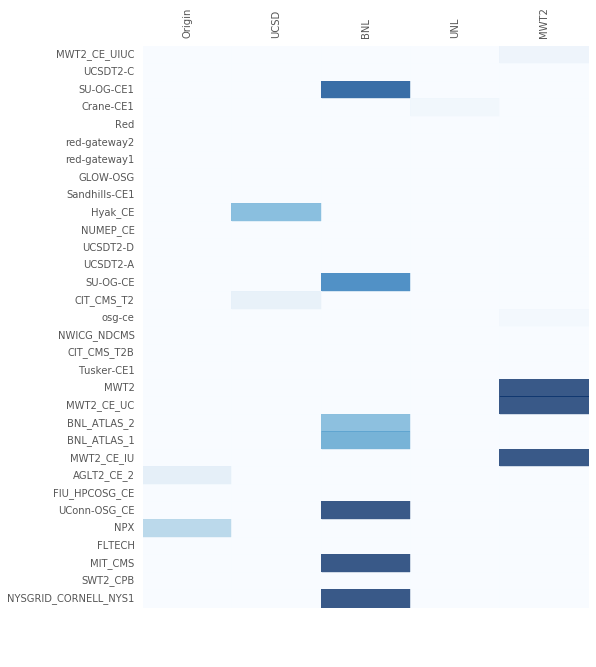

In [44]:
heat_percentage

fig, ax = plt.subplots()
heatmap = ax.pcolor(heat_percentage, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(8, 11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(heat_percentage.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(heat_percentage.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

labels = ['Origin','UCSD','BNL','UNL', 'MWT2']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(heat_percentage.index, minor=False)

# rotate the
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

[[ 0.79803933  0.34411252  0.67432952  0.79675657  0.97684652]
 [ 0.10195654  0.83043908  0.33954475  0.45545365  0.87002855]
 [ 0.97469989  0.11255552  0.69829218  0.1811609   0.73270863]
 [ 0.74980084  0.20496564  0.46324871  0.7162296   0.58667412]
 [ 0.13532329  0.39505063  0.86189494  0.74523361  0.91144356]
 [ 0.9678634   0.81064165  0.14846553  0.48418846  0.75175591]
 [ 0.69740858  0.65358157  0.45664222  0.70236003  0.1901273 ]]


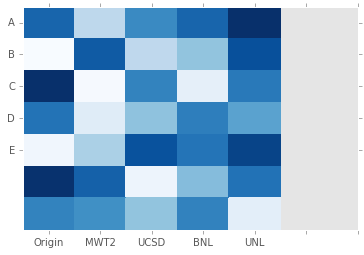

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

row_labels = ['Origin', 'MWT2', 'UCSD', 'BNL', 'UNL']
column_labels = list('ABCDEFG')
data = np.random.rand(7,5)
print(data)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()